<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_3_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](http://bit.ly/w-data)

**Date Created** :June 11,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

**Description** :The dataset is about predicting `Students_Score` based on the `no.of study hours` he had.





# Data Processing

In [ ]:
# Import necessary libraries
import pandas as pd                    # For handling csv files(constructs dataframes)
import numpy as np                     # For scientific computations as well as hanlding arrays,vectors,tensors
import matplotlib.pyplot as plt        # For visualisation of Data
import seaborn as sns                  # For visualisation with different plots 
import tensorflow as tf                # Framework


In [ ]:
dataset = pd.read_csv('http://bit.ly/w-data')              #Importing the csv file
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.info()                                             #getting som basic info of csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
dataset.shape                                      # Shape of the dataset
                

(25, 2)

In [ ]:
dataset.head(10)                                     # Ten elements from the top

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
dataset.tail(10)                                      # Ten elements from the bottom

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
print(f"There are {len(dataset.columns)} columns in the dataset")  # Finding number of  cols
print(dataset.columns)

There are 2 columns in the dataset
Index(['Hours', 'Scores'], dtype='object')


In [ ]:
dataset.iloc[:,0:].describe()                 #   Basic analysis over the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.isnull().sum()         # Checking Null values

Hours     0
Scores    0
dtype: int64

**Scatter Plot**

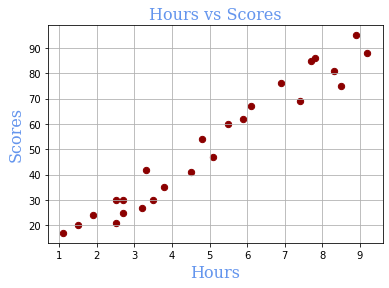

<Figure size 2880x2880 with 0 Axes>

In [ ]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'cornflowerblue',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(dataset['Hours'],dataset['Scores'],s=40,color='darkred')
plt.title('Hours vs Scores',fontdict=font)
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

The maximum score recorded in the data is above 95

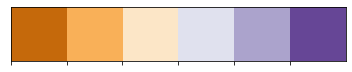

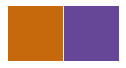

In [ ]:
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

**Pair Plot**

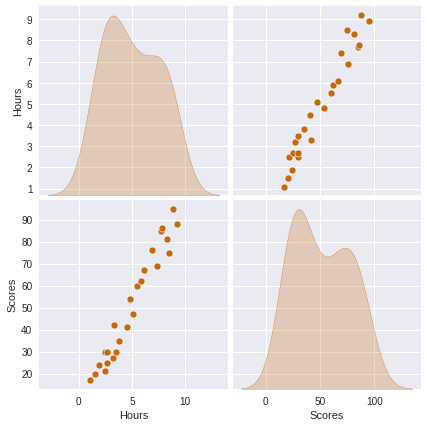

In [ ]:

sns.pairplot(dataset,x_vars=['Hours','Scores'],y_vars=['Hours','Scores'],diag_kind='kde',palette="hls",height=3)


**Box Plot**

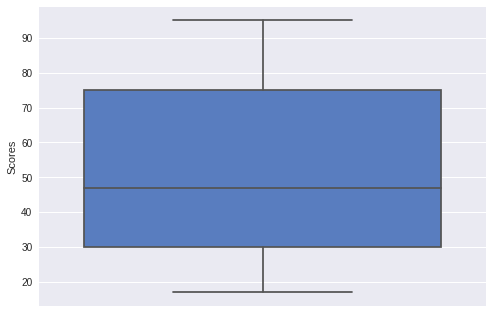

In [ ]:

sns.boxplot(y=dataset['Scores'],palette='muted')

**Violin Plot**

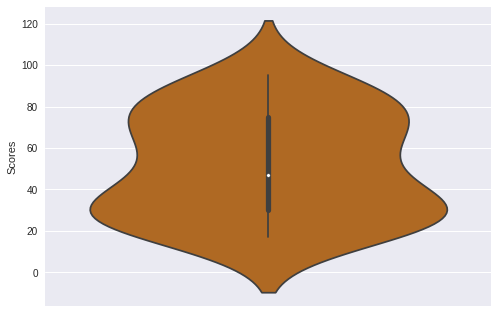

In [ ]:
sns.violinplot(y=dataset["Scores"])

In [ ]:
dataset.corr()                                          # Finding the correlation b/w variables

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Heat Map**

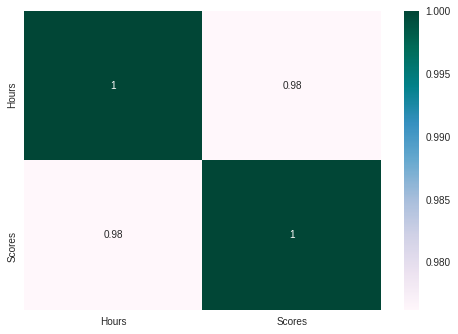

In [ ]:
sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")

## Data Splitting

In [ ]:
trainDataset = dataset.sample(frac=0.8, random_state=0)                                  # Dividing datasets into parts (80% and 20%)
testDataset = dataset.drop(trainDataset.index)


In [ ]:
print(f'After split the number of samples in trainDataset {trainDataset.shape[0]}')      # Counting the samples
print(f'After split the number of samples in testDataset {testDataset.shape[0]}')

After split the number of samples in trainDataset 20
After split the number of samples in testDataset 5


In [ ]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

    Hours  Scores
5     1.5      20
2     3.2      27
19    7.4      69
16    2.5      30
11    5.9      62
    Hours  Scores
0     2.5      21
3     8.5      75
12    4.5      41
15    8.9      95
21    4.8      54


In [ ]:
trainLabels = trainFeatures.pop('Scores')
testLabels = testFeatures.pop('Scores')

print(trainLabels.head())
print(testLabels.head())

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64
0     21
3     75
12    41
15    95
21    54
Name: Scores, dtype: int64


In [ ]:
print(trainLabels.describe())


count    20.000000
mean     50.050000
std      24.934599
min      17.000000
25%      29.250000
50%      44.500000
75%      70.750000
max      88.000000
Name: Scores, dtype: float64


## Using Simple Linear Regression to train the model

**Import  LinearRegression from `sklearn`**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures,trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
scorePreds = regressor.predict(testFeatures)           #Predicting the scores
print(scorePreds)

[27.49308148 86.20957221 47.06524505 90.12400492 50.00106959]


### Visualizing the training results

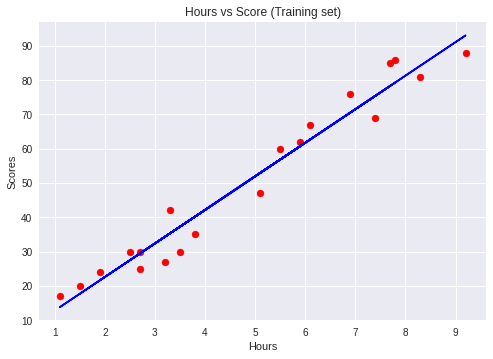

In [ ]:
plt.grid(True)
plt.scatter(trainFeatures, trainLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualizing the test results

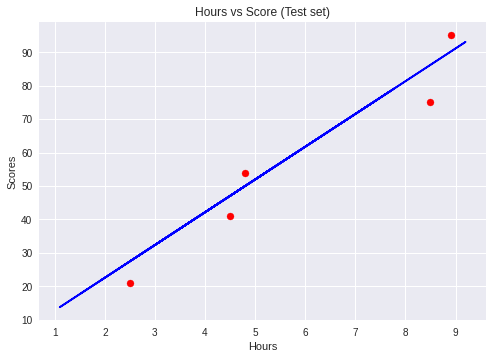

In [ ]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Using Rsquared to find the accuracy
$\mathrm{R}^{2}$= 1-$\frac{RSS}{TSS}$

RSS	=	sum of squares of residuals

TSS	=	total sum of squares

In [ ]:
a=regressor.score(trainFeatures,trainLabels)*100
b=regressor.score(testFeatures,testLabels)*100
print("Training accuracy =",a)
print("Testing accuracy =",b)

Training accuracy = 95.88089453328028
Testing accuracy = 92.65895859969137


### Comparing predicted and actual

In [ ]:
df=pd.DataFrame({"y_actual":testLabels,"y_predicted":scorePreds})
df

,y_actual,y_predicted
0,21,27.493081
3,75,86.209572
12,41,47.065245
15,95,90.124005
21,54,50.001070


### Calculating the metrics

In [ ]:
from sklearn import metrics
print("Mean Squared Error : ",metrics.mean_squared_error(testLabels,scorePreds))
print("Mean Absolute Error : ",metrics.mean_absolute_error(testLabels,scorePreds))
print(" The R squared value is :",regressor.score(testFeatures,testLabels))

Mean Squared Error :  48.87371722669467
Mean Absolute Error :  6.52856484554344
 The R squared value is : 0.9265895859969138


In [ ]:
prediction=regressor.predict([[9.25]])
print("For 9.25 hours of study the student will score : ",prediction[0])

For 9.25 hours of study the student will score :  93.54913354668787
